In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utility import read_csv_file, rename_columns, filter_columns, map_to_major_category, plot_industry_boxplots, perform_cross_validation, \
    calculate_growth_rates, predict_salary, prepare_salary_experience_model_data, analyze_features, build_and_evaluate_random_forest_model,  \
    convert_state_abbreviations, get_region_from_state, RegionSalaryAnalyzer, simplify_race, SalaryClassifier

In [2]:
df = read_csv_file('manager_survery.csv') #reading data from csv 

### Describing Data
As the data is quite raw and hard to perform data operation requires some basic data cleaning like filtering 'USA' region and columns renaming

In [3]:
df.columns # checking columns 

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [4]:
df.shape #row and column size

(28089, 18)

In [5]:
df.head() #viewing data rows

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Data Cleaning

In [6]:
# Filter for rows where country indicates the United States
us_data = df[df['What country do you work in?'].str.contains("United States|USA|US", na=False, case=False)]
us_data.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White


In [7]:
# Rename columns for easier processing
renamed_columns = {
    'Timestamp': 'timestamp',
    'How old are you?': 'age_group',
    'What industry do you work in?': 'industry',
    'Job title': 'job_title',
    'If your job title needs additional context, please clarify here:': 'job_context',
    'What is your annual salary? (You\'ll indicate the currency in a later question. '
    'If you are part-time or hourly, please enter an annualized equivalent -- '
    'what you would earn if you worked the job 40 hours a week, 52 weeks a year.)': 'annual_salary',
    'How much additional monetary compensation do you get, if any '
    '(for example, bonuses or overtime in an average year)? Please only include monetary compensation here, '
    'not the value of benefits.': 'additional_compensation',
    'Please indicate the currency': 'currency',
    'If "Other," please indicate the currency here:': 'other_currency',
    'If your income needs additional context, please provide it here:': 'income_context',
    'What country do you work in?': 'country',
    'If you\'re in the U.S., what state do you work in?': 'state',
    'What city do you work in?': 'city',
    'How many years of professional work experience do you have overall?': 'overall_experience',
    'How many years of professional work experience do you have in your field?': 'field_experience',
    'What is your highest level of education completed?': 'education_level',
    'What is your gender?': 'gender',
    'What is your race? (Choose all that apply.)': 'race'
}

us_data = rename_columns(us_data, renamed_columns)
us_data.head()

,timestamp,age_group,industry,job_title,job_context,annual_salary,additional_compensation,currency,"If ""Other,"" please indicate the currency here:",income_context,country,state,city,overall_experience,field_experience,education_level,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White


In [8]:
# Clean salary columns by removing commas and converting to numeric
us_data['annual_salary'] = us_data['annual_salary'].str.replace(",", "").astype(float)
us_data['additional_compensation'] = us_data['additional_compensation'].fillna(0)


In [9]:
# Create a new column for total compensation
us_data['total_compensation'] = us_data['annual_salary'] + us_data['additional_compensation']


In [10]:
us_data['major_industry'] = us_data['industry'].apply(map_to_major_category)
us_data = us_data[us_data.major_industry!='Other'] # removing others industry data and keeping only relavant data

In [11]:
# keeping data with relevant gender, race and education
us_data = us_data[us_data.gender.str.contains("Man|Woman", na=False, case=False)] 

In [12]:
experience_order = [
    '1 year or less',
    '2 - 4 years',
    '5-7 years',
    '8 - 10 years',
    '11 - 20 years',
    '21 - 30 years',
    '31 - 40 years',
    '41 years or more'
]

### Investigation
#### 1.) How do salary distributions vary across experience levels within each industry

In [13]:
# Group data by industry and overall experience, calculate salary statistics
salary_analysis = us_data.sort_values(
    by=['major_industry', 'overall_experience'],
    key=lambda x: pd.Categorical(x, categories=experience_order, ordered=True)
)
for industry in list(salary_analysis['major_industry'].unique()):
    industry_analysis = salary_analysis[salary_analysis.major_industry==industry]
    print(industry_analysis.groupby(['major_industry', 'overall_experience'])['annual_salary'].describe())



                                          count           mean            std  \
major_industry        overall_experience                                        
Professional Services 1 year or less       38.0   85016.157895   86757.119190   
                      11 - 20 years       611.0  107209.307692   58093.586944   
                      2 - 4 years         229.0   69115.331878   27344.822139   
                      21 - 30 years       167.0  112158.029940   59336.640546   
                      31 - 40 years        43.0  207216.837209  749501.599912   
                      41 years or more      6.0  123000.000000   65674.957175   
                      5-7 years           353.0   82290.566572   70734.583517   
                      8 - 10 years        358.0   99227.111732   50092.608757   

                                              min      25%       50%  \
major_industry        overall_experience                               
Professional Services 1 year or less      380

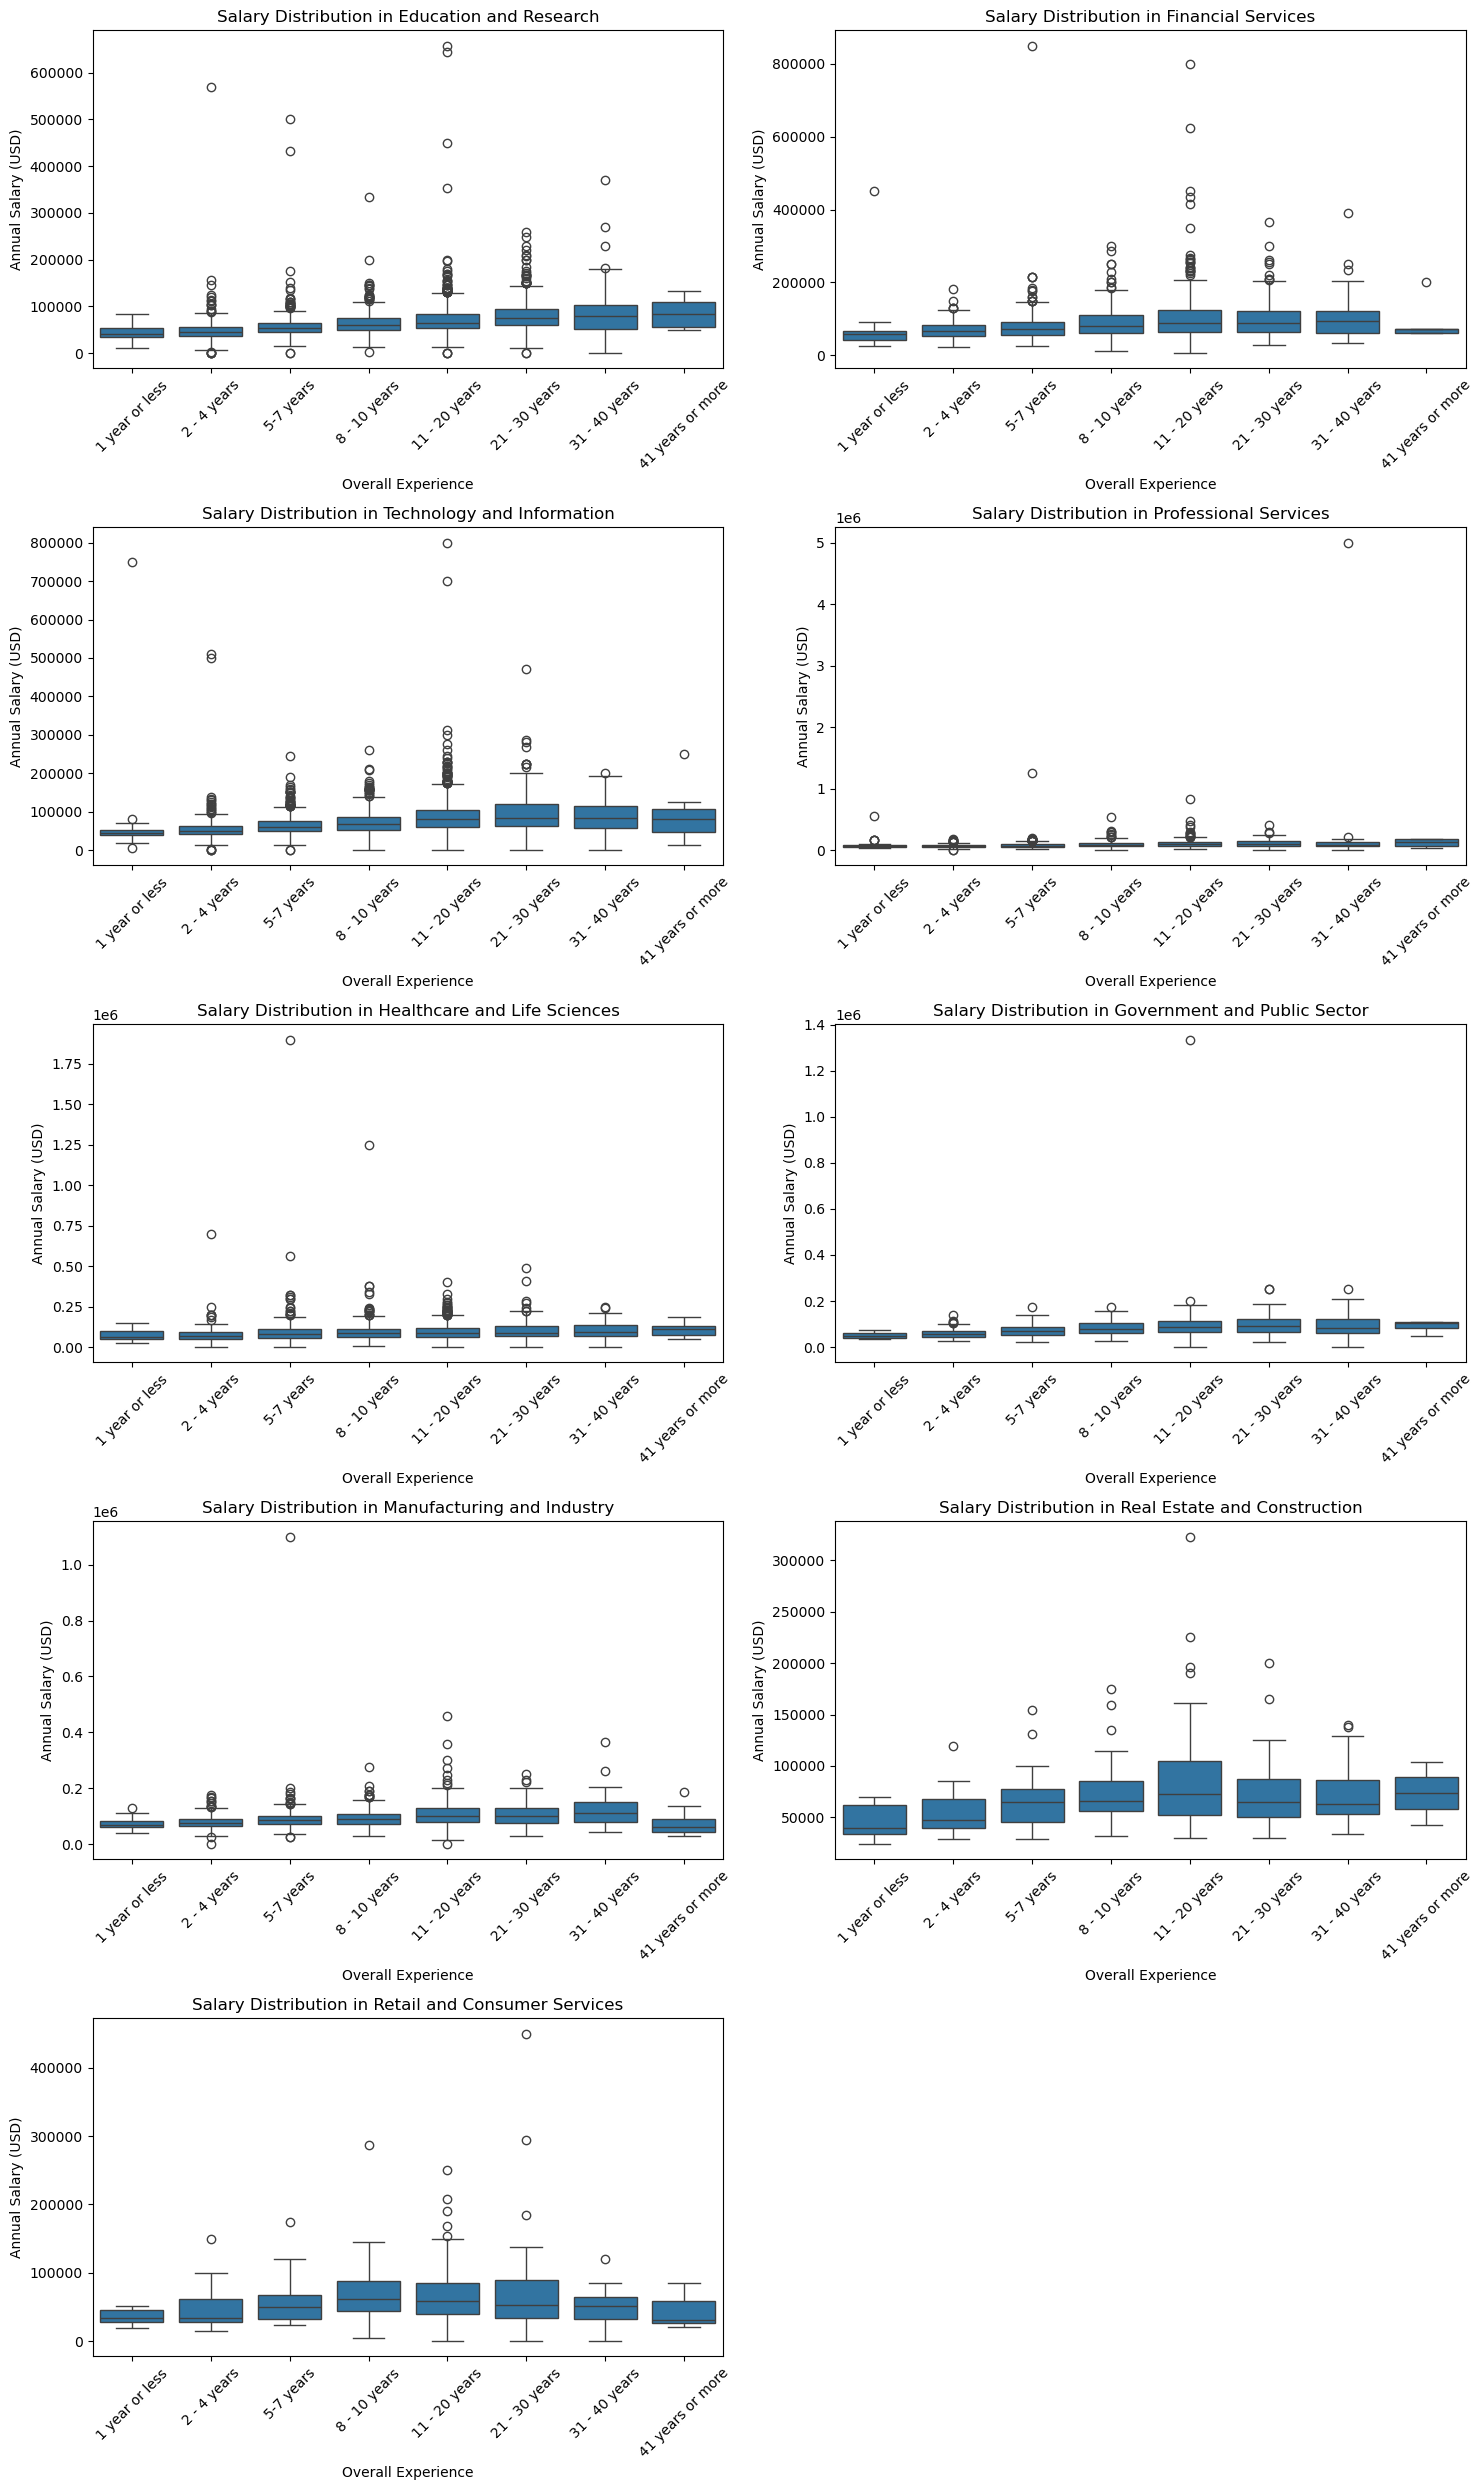

In [14]:

# Filter data for visualization
filtered_data = filter_columns(us_data, ['major_industry', 'overall_experience', 'annual_salary'])

# Get unique industries
industries = filtered_data['major_industry'].unique()

# Create plots
plot_industry_boxplots(filtered_data, industries)

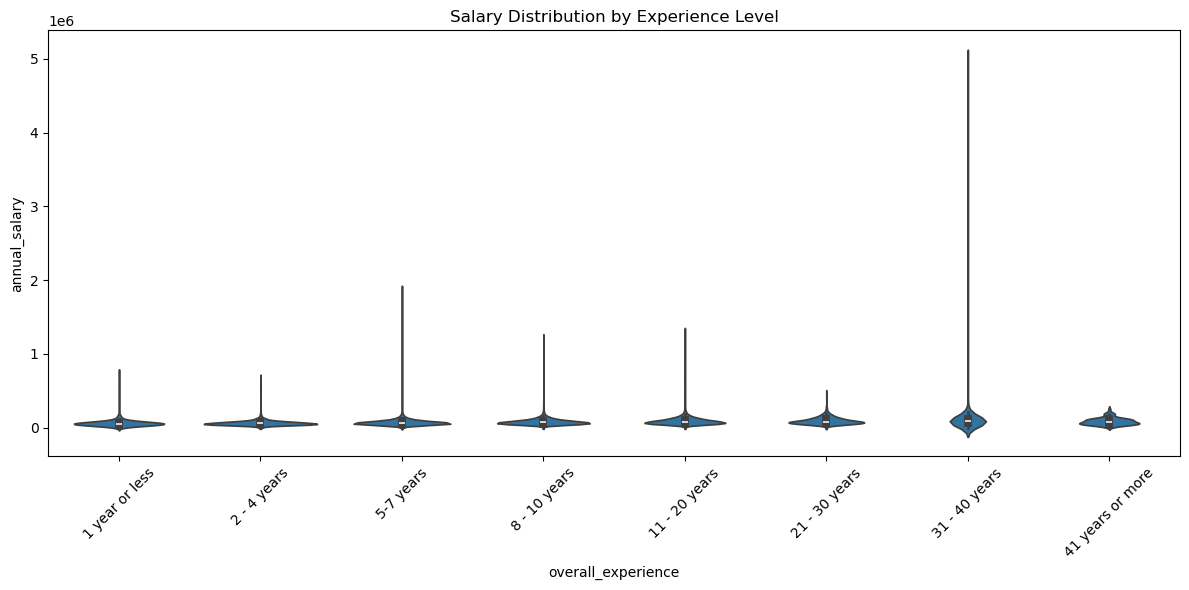

In [15]:
# Calculate summary statistics by experience level across all industries
experience_summary = us_data.groupby('overall_experience')['annual_salary'].agg([
    'mean', 'median', 'std', 'count'
]).round(2)


# Calculate industry-specific metrics
industry_metrics = us_data.groupby('major_industry').agg({
    'annual_salary': ['mean', 'median', 'std', 'count']
}).round(2)

# Create a pivot table for experience-industry comparison
salary_pivot = pd.pivot_table(
    us_data,
    values='annual_salary',
    index='major_industry',
    columns='overall_experience',
    aggfunc='median'
).round(2)

# Calculate the salary range (max - min) for each industry
salary_range = us_data.groupby('major_industry').agg({
    'annual_salary': lambda x: x.max() - x.min()
}).round(2)

# Visualization of salary distributions
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=us_data,
    x='overall_experience',
    y='annual_salary',
    order=experience_order
)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Experience Level')
plt.tight_layout()
plt.show()


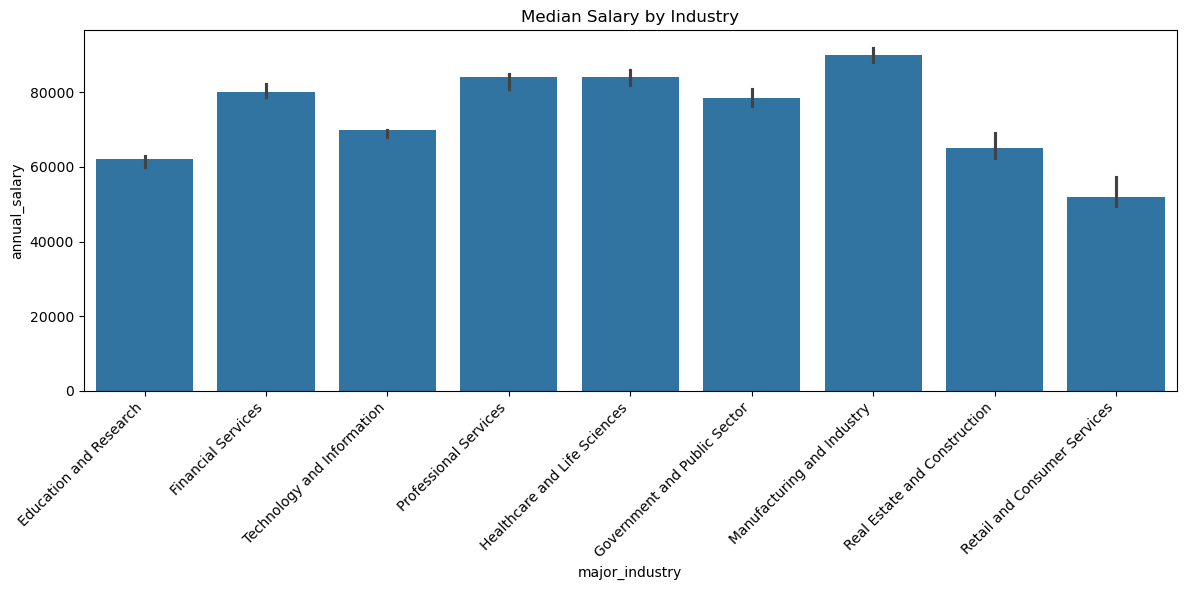

In [16]:
# Industry comparison plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=us_data,
    x='major_industry',
    y='annual_salary',
    estimator='median'
)
plt.xticks(rotation=45, ha='right')
plt.title('Median Salary by Industry')
plt.tight_layout()
plt.show()

In [17]:
X, y, industry_enc, exp_enc = prepare_salary_experience_model_data(us_data)
model, metrics, X_test, y_test = build_and_evaluate_random_forest_model(X, y)

# Analyze feature importance
feature_importance = analyze_features(model, ['Industry', 'Experience'])

# Print results
print("Model Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

print("\nFeature Importance:")
print(feature_importance)

Model Performance Metrics:
RMSE: 48639.53
MAE: 28866.84
R2: 0.05
MAPE: inf

Feature Importance:
      Feature  Importance
0    Industry     0.54911
1  Experience     0.45089


In [18]:
perform_cross_validation(model, X, y)

{'Mean CV Score': 0.0522676902187903, 'CV Score Std': 0.015048213237006182}

#### 2) How do salary levels vary by industry and geographic location?

In [19]:
state_data = us_data.__deepcopy__()
state_data['state'] = state_data['state'].apply(convert_state_abbreviations) # converting states to short form
state_data = state_data[state_data.state!='null']
state_data

,timestamp,age_group,industry,job_title,job_context,annual_salary,additional_compensation,currency,"If ""Other,"" please indicate the currency here:",income_context,country,state,city,overall_experience,field_experience,education_level,gender,race,total_compensation,major_industry
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.0,0.0,USD,NaN,NaN,United States,MA,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0,Education and Research
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.0,0.0,USD,NaN,NaN,US,TN,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0,Financial Services
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.0,3000.0,USD,NaN,NaN,USA,WI,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,65000.0,Technology and Information
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000.0,0.0,USD,NaN,NaN,United States,AZ,Yuma,5-7 years,5-7 years,Master's degree,Man,White,50000.0,Education and Research
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000.0,0.0,USD,NaN,I work for a Charter School,United States,FL,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White",45000.0,Financial Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28071,9/13/2024 16:59:35,25-34,"Accounting, Banking & Finance",Staff Accountant,NaN,62500.0,0.0,USD,NaN,NaN,USA,GA,Johns Creek,1 year or less,1 year or less,Master's degree,Man,White,62500.0,Financial Services
28075,9/19/2024 11:08:07,18-24,Engineering or Manufacturing,Operations Project Lead,NaN,41600.0,0.0,USD,NaN,NaN,United States,GA,Milledgeville,5-7 years,1 year or less,Some college,Man,"Hispanic, Latino, or Spanish origin",41600.0,Manufacturing and Industry
28079,9/23/2024 22:53:33,35-44,Health care,Pharmacy Buyer,Retail Pharmacy,53060.0,0.0,USD,NaN,NaN,United States of America,MO,Springfield,21 - 30 years,11 - 20 years,Some college,Woman,White,53060.0,Healthcare and Life Sciences
28080,9/25/2024 19:54:18,45-54,"Accounting, Banking & Finance",Product Manager Lead,NaN,117000.0,8000.0,USD,NaN,NaN,USA,MO,Remote,11 - 20 years,11 - 20 years,College degree,Woman,White,125000.0,Financial Services


In [20]:

# Calculate regional salary variations
regional_salary = state_data.groupby(['state', 'major_industry'])['total_compensation'].median().unstack()
regional_salary

major_industry,Education and Research,Financial Services,Government and Public Sector,Healthcare and Life Sciences,Manufacturing and Industry,Professional Services,Real Estate and Construction,Retail and Consumer Services,Technology and Information
state,,,,,,,,,
AK,77945.5,103050.0,75972.0,85500.0,100000.0,91500.0,NaN,52000.0,67500.0
AL,51007.0,56000.0,86500.0,65250.0,89600.0,59000.0,46000.0,52500.0,58500.0
AR,49300.0,78000.0,55000.0,77000.0,140000.0,NaN,52000.0,155000.0,45915.0
AZ,57250.0,90000.0,70000.0,79000.0,110000.0,74000.0,60700.0,67682.5,56000.0
CA,75650.0,100250.0,92500.0,115000.0,120000.0,108000.0,85000.0,60872.5,82562.5
CO,64500.0,80450.0,65834.5,79625.0,92514.0,76250.0,67000.0,57250.0,70000.0
CT,81000.0,87700.0,76000.0,85000.0,112200.0,90000.0,49250.0,39500.0,77500.0
DE,58000.0,87500.0,51726.0,96000.0,108000.0,98495.0,132000.0,NaN,62000.0
FL,54000.0,77850.0,61200.0,82000.0,92500.0,78000.0,70500.0,33280.0,60600.0


In [21]:
# Geographic Analysis
state_stats = state_data.groupby('state').agg({
    'total_compensation': ['count', 'mean', 'median', 'std']
}).round(2)
state_stats

total_compensation                               
                   count       mean   median        std
state                                                  
AK                    41   81991.83  75972.0   30243.81
AL                    83   70899.84  61000.0   38653.15
AR                    41   81374.95  61000.0   74994.69
AZ                   221   83302.38  68000.0   50945.04
CA                  1450  111669.82  92000.0   99700.42
CO                   390   84702.49  73000.0   52367.40
CT                   173   98811.94  84000.0  145828.09
DE                    35   88017.51  80145.0   44445.11
FL                   363   83727.71  66000.0   72362.55
GA                   364   83688.85  72250.0   50038.39
HI                    24   63462.33  63350.0   26236.64
IA                   128   70450.86  64370.0   36472.77
ID                    70   65896.01  58500.0   42853.18
IL                   811   91211.55  75000.0   60646.23
IN                   245   71423.57  64000.0   33634.63
KS                   107   66485.86  61000.0   26595.50
KY                   145   68501.13  60500.0   35150.99
LA                    91   72908.44  61000.0   37971.18
MA                   982   97304.11  83000.0   57001.79
MD                   413   91751.30  83250.0   47095.28
ME                    94   64802.60  57250.0   26634.06
MI                   392   78495.19  67200.0   50730.05
MN                   501   83967.31  75000.0   40685.79
MO                   230   77504.49  68000.0   44917.10
MS                    39   62140.00  53000.0   27741.74
MT                    50   61554.04  46500.0   33696.65
NE                    71   70989.76  64000.0   34550.38
NV                    66   77608.36  71500.0   39316.15
OH                   460   76187.71  67000.0   44921.00
OK                    74   65357.15  54000.0   35244.81
OR                   356   82130.71  73000.0   40954.74
PA                   666   84384.36  70000.0   62684.56
TN                   211   79479.18  63500.0   66784.87
TX                   805   85397.19  72600.0   49787.51
UT                   127   81162.56  71000.0   53100.63
VA                   542   93256.85  80000.0   58087.06
VT                    47   68391.91  60000.0   29960.69
WA                   650   97561.82  83950.0   75502.39
WI                   313   71626.57  65000.0   32639.09
WY                    21   59566.81  50004.0   27148.46

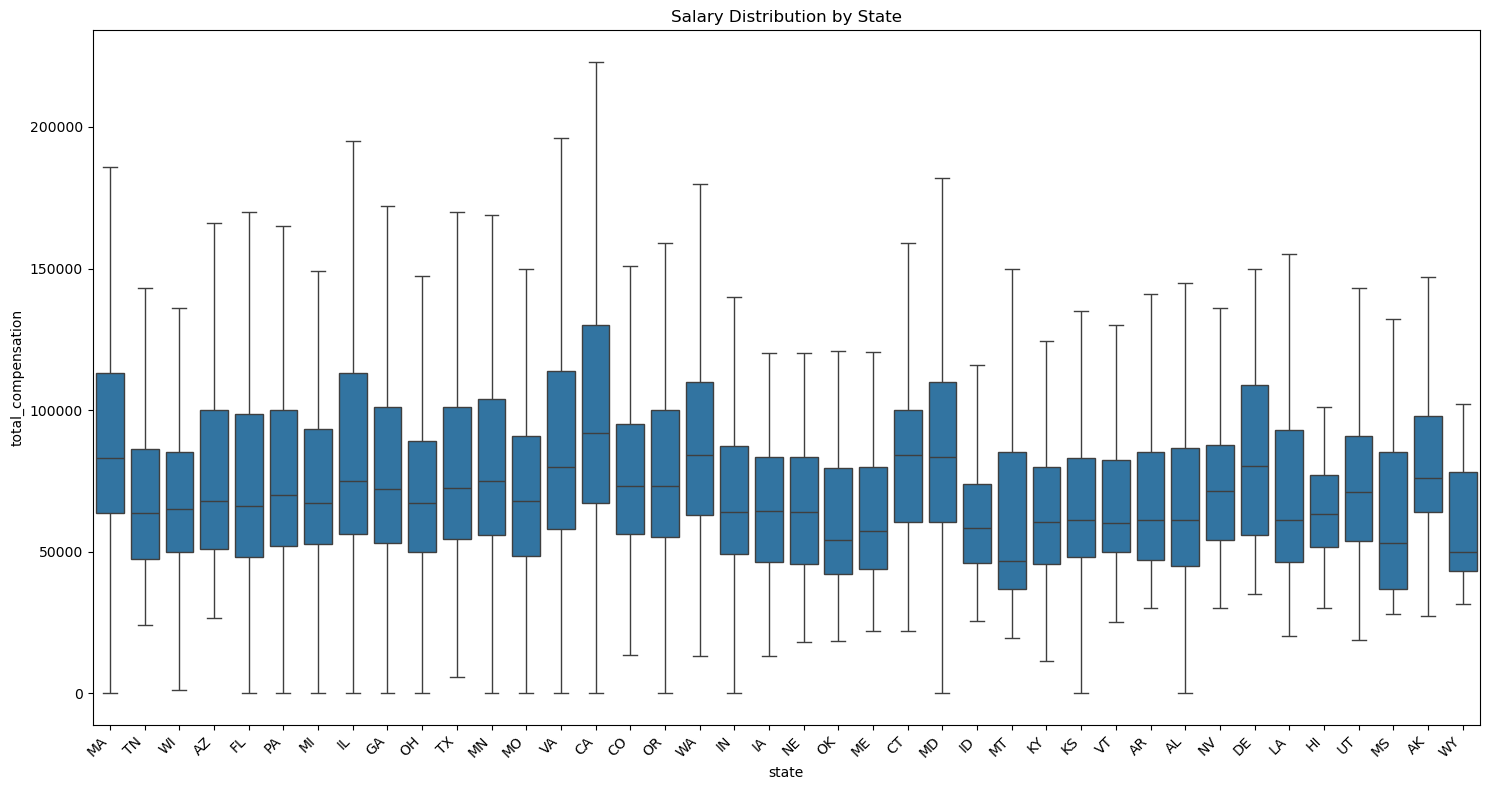

In [22]:
# State-wise salary distribution
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=state_data,
    x='state',
    y='total_compensation',
    showfliers=False
)
plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution by State')
plt.tight_layout()

In [23]:
#apply region mapping
state_data['region'] = state_data['state'].apply(get_region_from_state)

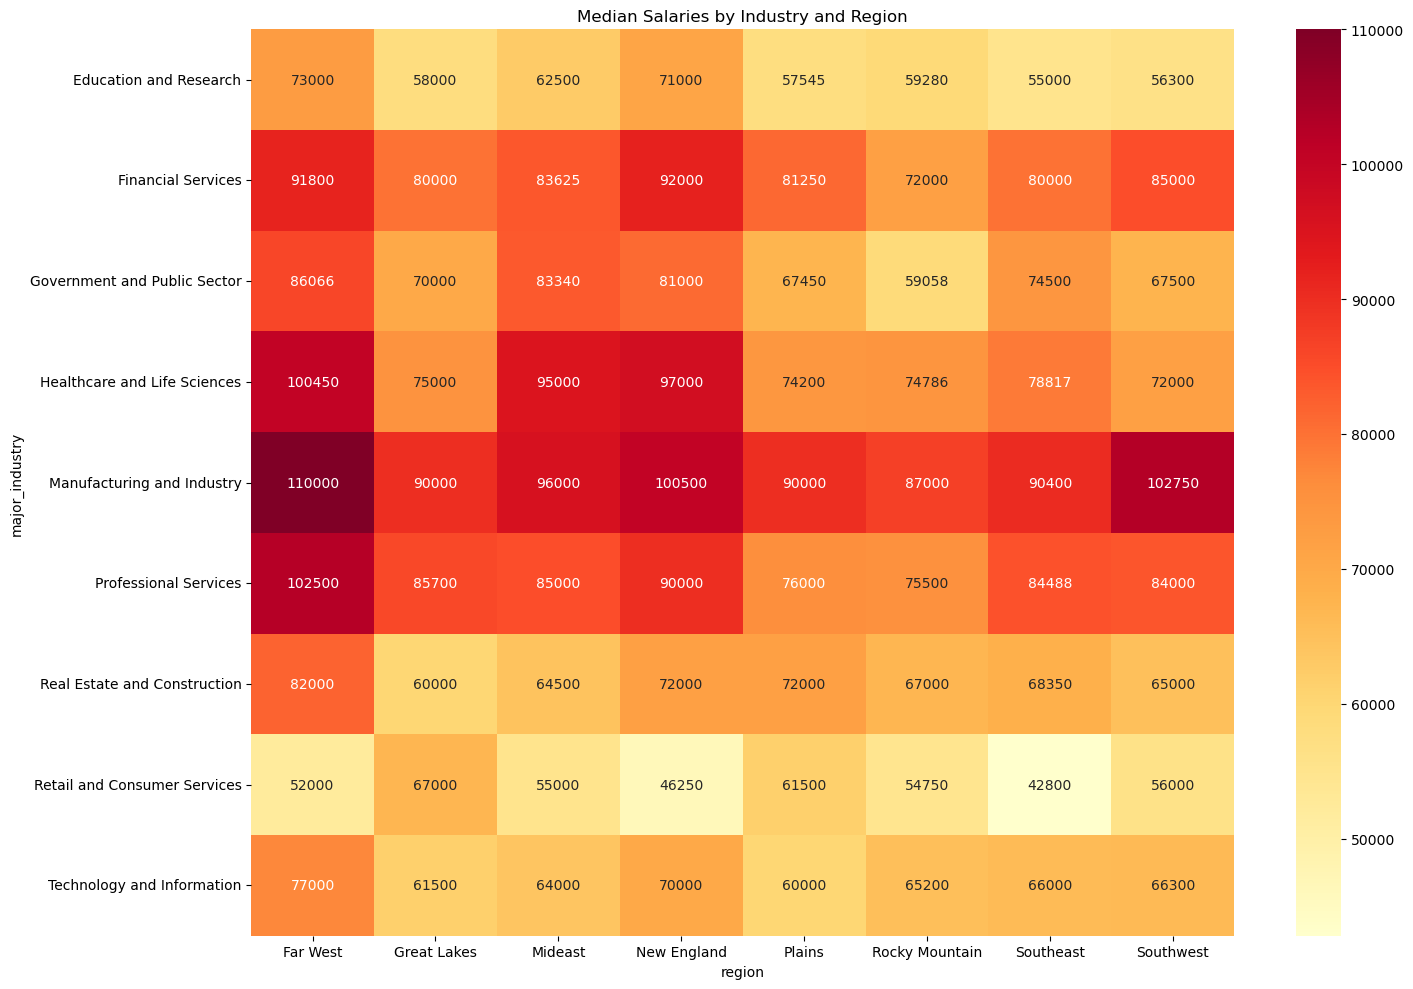

In [24]:
# Calculate median salaries by industry and state
industry_state_median = pd.pivot_table(
    state_data,
    values='total_compensation',
    index='major_industry',
    columns='region',
    aggfunc='median'
).round(2)
# Heatmap of median salaries
plt.figure(figsize=(15, 10))
sns.heatmap(
    industry_state_median,
    cmap='YlOrRd',
    annot=True,
    fmt='.0f'
)
plt.title('Median Salaries by Industry and Region')
plt.tight_layout()
plt.show()


In [25]:
# Get statistical analysis
analyzer = RegionSalaryAnalyzer(state_data)

# Build and evaluate model
metrics = analyzer.build_prediction_model()
print("\nModel Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

# Example prediction
industry = "Technology and Information"
region = "Mideast"
predicted_salary = analyzer.predict_salary(industry, region)
print(f"\nPredicted salary for {industry} in {region}: ${predicted_salary:,.2f}")


Model Performance Metrics:
R2: 0.09
RMSE: 53319.10
MAE: 33999.64

Predicted salary for Technology and Information in Mideast: $77,136.58


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### 3) Is there a pay disparity across different demographic groups?

In [26]:
education_order = [
    'High School',
    'College degree',
    "Master's degree",
    'PhD',
]

In [27]:
demographic_data  = us_data.__deepcopy__()
# Apply grouping
demographic_data['race_grouped'] = demographic_data['race'].apply(simplify_race)
demographic_data = demographic_data[demographic_data.race_grouped!="Not Specified"]

# Education level
demographic_data['education_level'].replace('Professional degree (MD, JD, etc.)', "Master's degree", inplace=True)
demographic_data['education_level'].replace('Some college', "College degree", inplace=True)
demographic_data['education_level'] = pd.Categorical(demographic_data['education_level'], categories=education_order, ordered=True)
demographic_data.groupby('education_level')['total_compensation'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)

/var/folders/dk/p8zfdjl17px04ptlncr_lyzm0000gn/T/ipykernel_74779/1834393507.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demographic_data['education_level'].replace('Professional degree (MD, JD, etc.)', "Master's degree", inplace=True)
/var/folders/dk/p8zfdjl17px04ptlncr_lyzm0000gn/T/ipykernel_74779/1834393507.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work b

,count,mean,median,std
education_level,,,,
High School,277,69569.85,57200.0,47231.72
College degree,8314,83854.11,71289.5,60170.65
Master's degree,5962,97525.37,82000.0,95319.07
PhD,829,112042.34,95000.0,77617.18


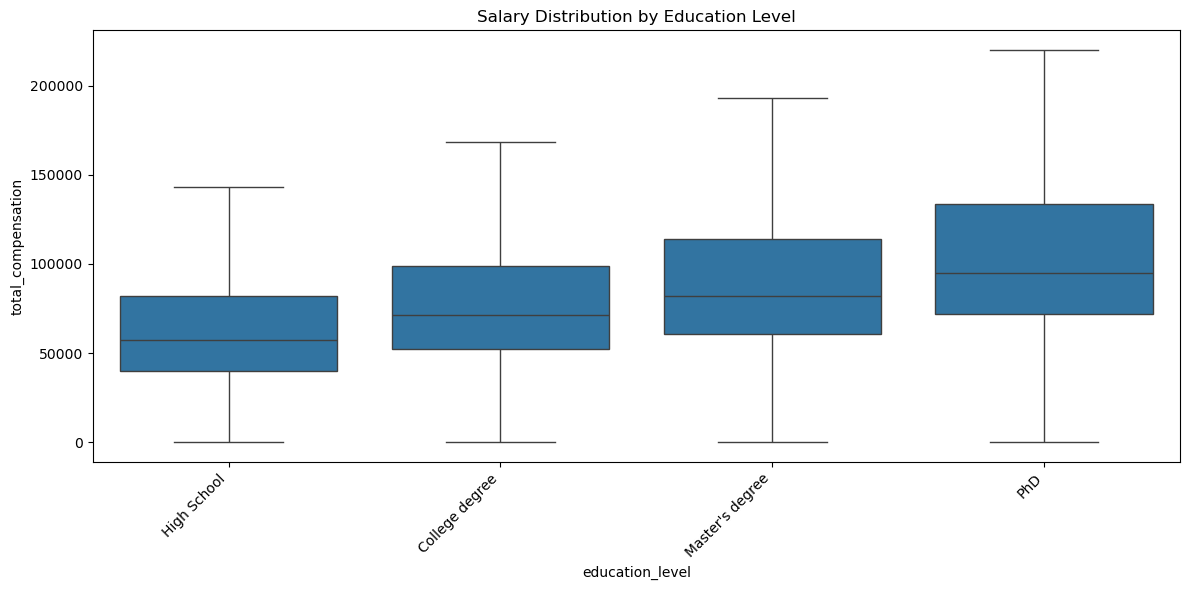

In [28]:
# Education level pay distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=demographic_data, x='education_level', y='total_compensation', showfliers=False)
plt.title('Salary Distribution by Education Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [29]:
# Gender-based analysis
gender_stats = demographic_data.groupby('gender')['total_compensation'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)
gender_stats

,count,mean,median,std
gender,,,,
Man,2272,109038.17,90000.0,97723.82
Woman,13184,87235.09,75000.0,72384.80


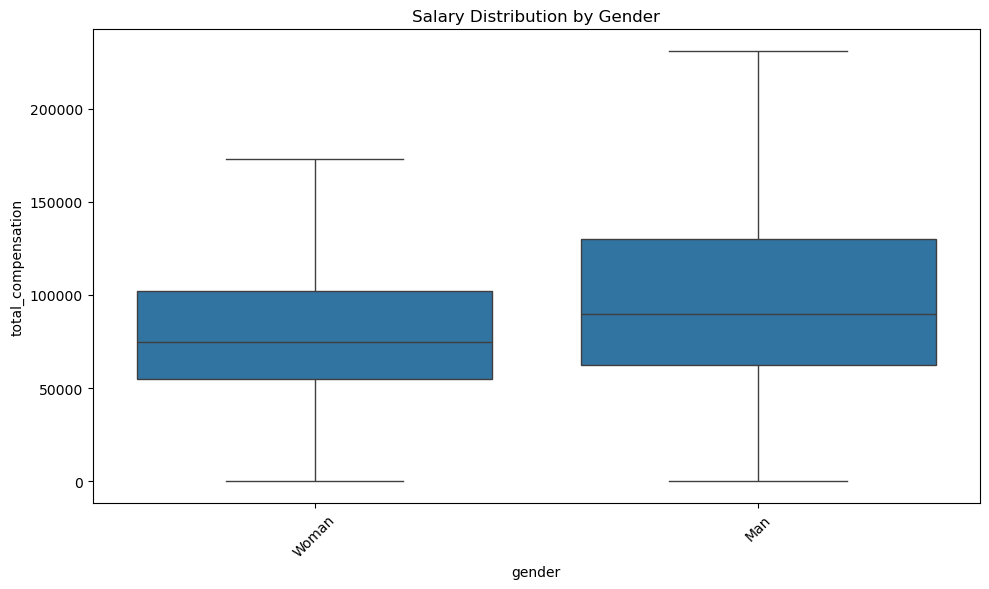

In [30]:
# Visualize gender pay distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=demographic_data, x='gender', y='total_compensation', showfliers=False)
plt.title('Salary Distribution by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Intersectional analysis
education_gender = pd.pivot_table(
    demographic_data,
    values='total_compensation',
    index='education_level',
    columns='gender',
    aggfunc='median'
).round(2)
# Calculate pay gaps
def calculate_pay_gap(group1_salary, group2_salary):
    return ((group1_salary - group2_salary) / group2_salary * 100).round(2)

gender_gap = calculate_pay_gap(
    gender_stats.loc['Man', 'median'],
    gender_stats.loc['Woman', 'median']
)
gender_gap

/var/folders/dk/p8zfdjl17px04ptlncr_lyzm0000gn/T/ipykernel_74779/2778632403.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  education_gender = pd.pivot_table(


20.0

In [32]:
# Race-based analysis
race_stats = demographic_data.groupby('race_grouped')['total_compensation'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)
race_stats

,count,mean,median,std
race_grouped,,,,
Asian/Asian American,854,101868.20,86000.0,59012.52
Black/African American,518,102994.22,77075.0,234343.41
Hispanic/Latino,596,87657.99,73000.0,69215.45
Middle Eastern/North African,76,89248.13,71800.0,58330.04
Multiple/Other,256,99867.63,83176.0,82413.09
Native American/Alaska Native,49,79059.16,73000.0,39263.30
White,13107,89191.17,75000.0,64875.36


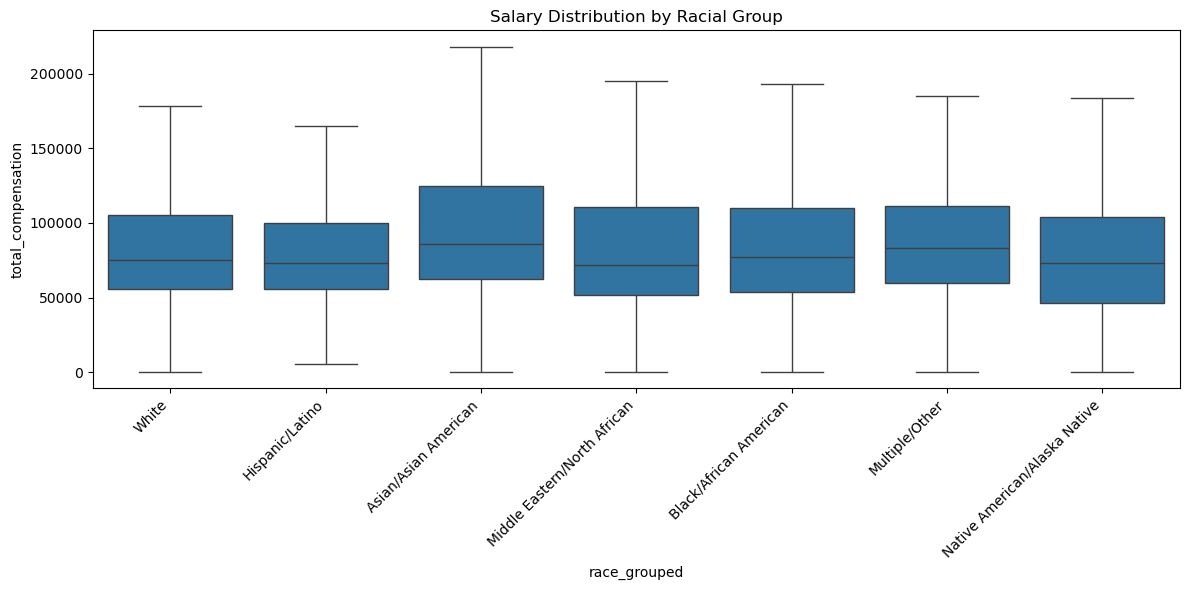

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=demographic_data,
    x='race_grouped',
    y='total_compensation',
    showfliers=False
)
plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution by Racial Group')
plt.tight_layout()
plt.show()

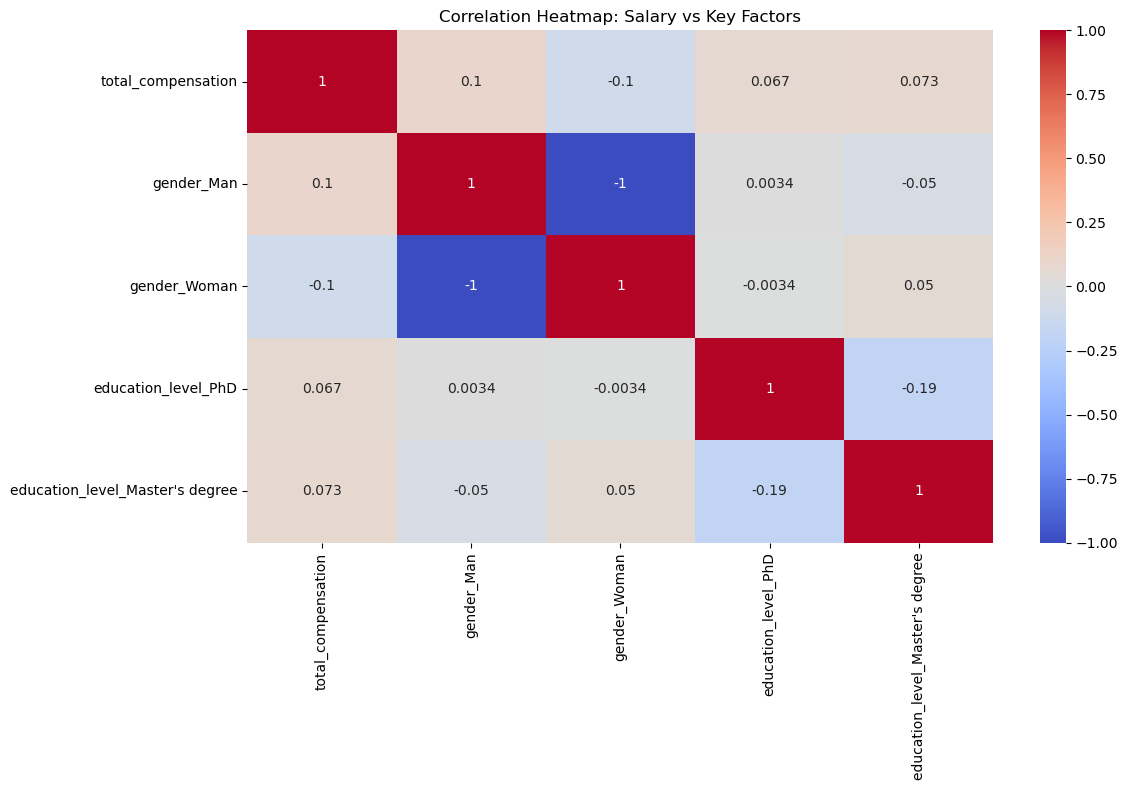

In [34]:
encoded_df = pd.get_dummies(demographic_data, columns=['gender', 'race_grouped', 'education_level', 'major_industry', 'overall_experience'])
# Calculate correlation with salary
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(
    encoded_df[['total_compensation', 'gender_Man', 'gender_Woman', 'education_level_PhD', 
    'education_level_Master\'s degree']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap: Salary vs Key Factors')
plt.tight_layout()
plt.show()

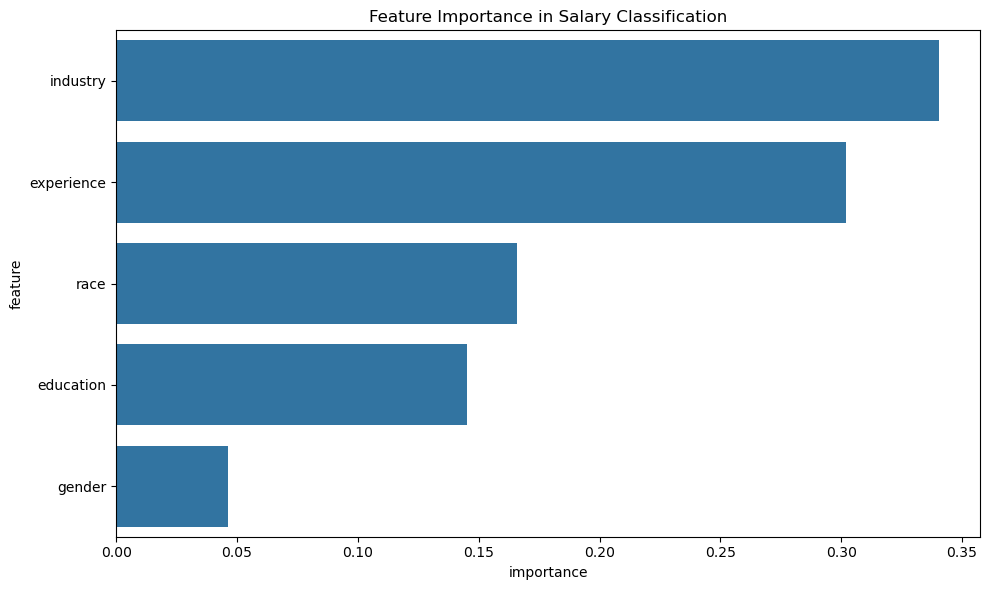

In [37]:
classifier = SalaryClassifier()
X, y = classifier.prepare_data(demographic_data)
results = classifier.train_and_evaluate(X, y)

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results['feature_importance'],
    x='importance',
    y='feature'
)
plt.title('Feature Importance in Salary Classification')
plt.tight_layout()
plt.show()

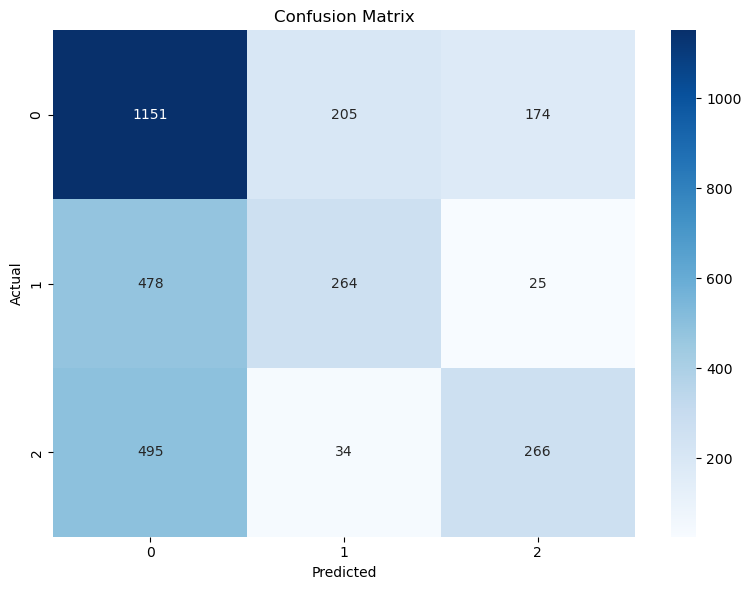

In [38]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    results['confusion_matrix'],
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [40]:

# Print classification report
print("\nClassification Report:")
print(results['classification_report'])



Classification Report:
              precision    recall  f1-score   support

     Average       0.54      0.75      0.63      1530
        High       0.52      0.34      0.42       767
         Low       0.57      0.33      0.42       795

    accuracy                           0.54      3092
   macro avg       0.55      0.48      0.49      3092
weighted avg       0.55      0.54      0.52      3092



In [41]:
# Example prediction
sample_prediction = classifier.predict_salary_category(
    gender='Man',
    race='White',
    education='Master\'s degree',
    industry='Technology and Information',
    experience='5-7 years'
)
print(f"\nPredicted salary category: {sample_prediction}")


Predicted salary category: Average


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
